In [1]:
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams 
from sklearn.metrics import mean_absolute_error
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
df = pd.read_excel('oil.xlsx')
df.head()

,Month,Canada Total
0,2000-01-01,2.146907e+06
1,2000-02-01,2.160835e+06
2,2000-03-01,2.080255e+06
3,2000-04-01,2.139488e+06
4,2000-05-01,2.185353e+06


<AxesSubplot:title={'center':'Нефть в Канаде'}>

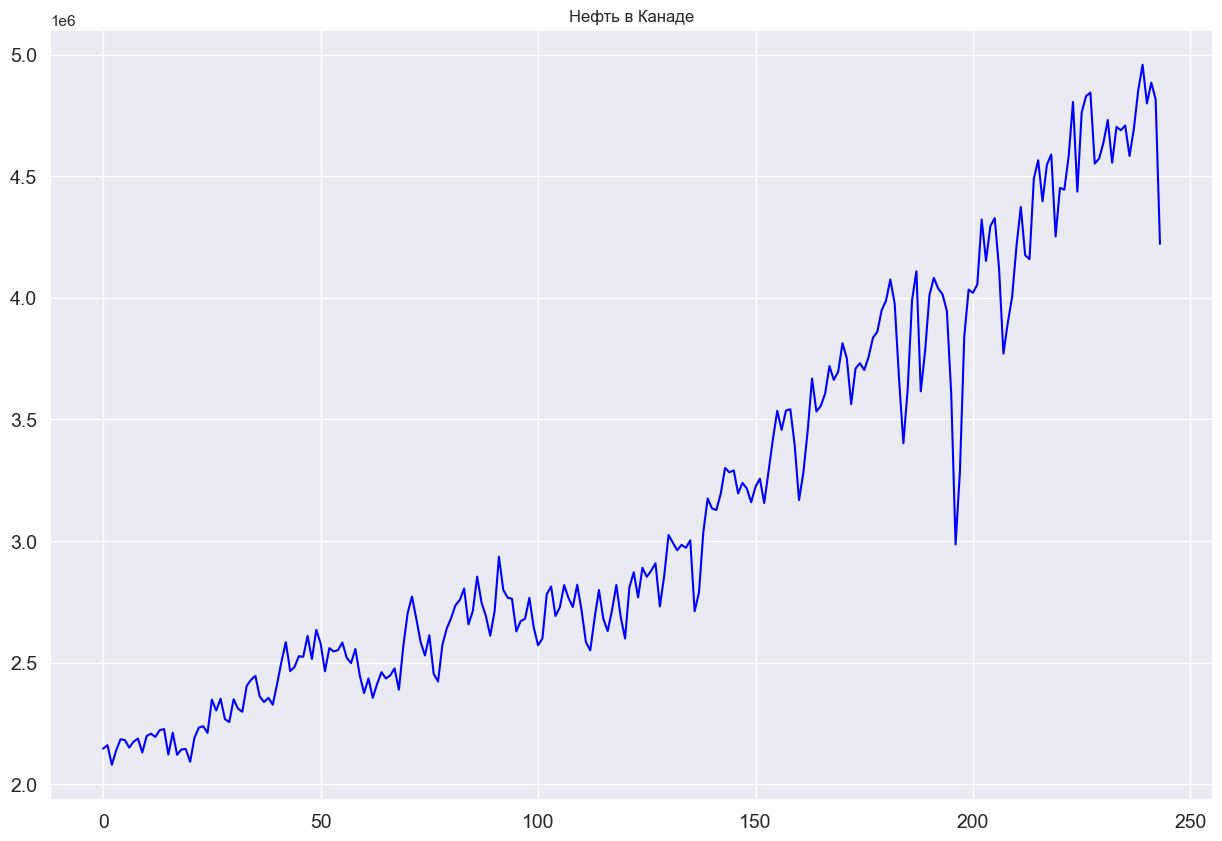

In [30]:
df['Canada Total'].plot( figsize=(15,10),title= 'Нефть в Канаде', fontsize=14, color="blue")

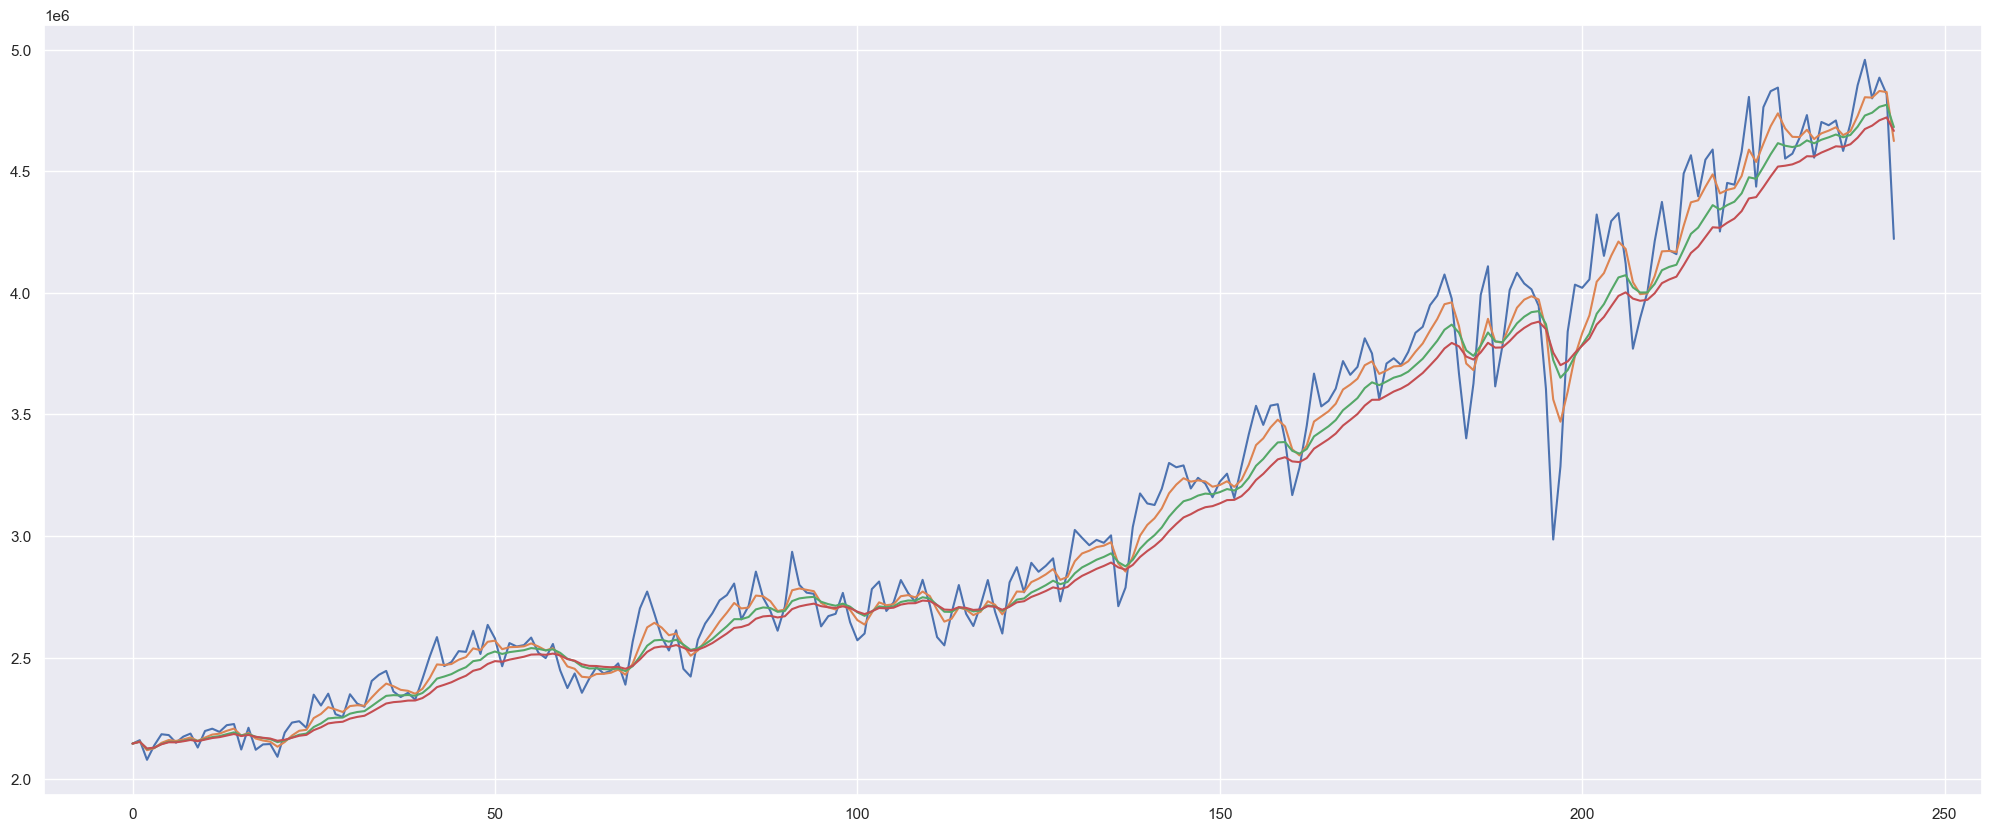

In [32]:
df['ema_2'] = df['Canada Total'].ewm(2).mean()
df['ema_5'] = df['Canada Total'].ewm(5).mean()
df['ema_8'] = df['Canada Total'].ewm(8).mean()
plt.figure(figsize=(25,10))
plt.plot(df['Canada Total'], label='Оригинальный ряд')
plt.plot(df.ema_2, label='Размер окна=2')
plt.plot(df.ema_5, label='Размер окна=5')
plt.plot(df.ema_8, label='Размер окна=8')

## Заметим, что общий тренд - повышение, рост, но это было и так достаточно очевидно, рассмотрим меньшее количесвто измерений

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Month         244 non-null    datetime64[ns]
 1   Canada Total  244 non-null    float64       
 2   ema_2         244 non-null    float64       
 3   ema_5         244 non-null    float64       
 4   ema_8         244 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.7 KB


In [34]:
df['year'], df['month'] = df['Month'].dt.year, df['Month'].dt.month

In [35]:
df.head()

,Month,Canada Total,ema_2,ema_5,ema_8,year,month
0,2000-01-01,2.146907e+06,2.146907e+06,2.146907e+06,2.146907e+06,2000,1
1,2000-02-01,2.160835e+06,2.155264e+06,2.154504e+06,2.154280e+06,2000,2
2,2000-03-01,2.080255e+06,2.119733e+06,2.125131e+06,2.126649e+06,2000,3
3,2000-04-01,2.139488e+06,2.127939e+06,2.129752e+06,2.130446e+06,2000,4
4,2000-05-01,2.185353e+06,2.149979e+06,2.145245e+06,2.144153e+06,2000,5


In [36]:
df_pivot = pd.pivot_table(df, values = "Canada Total", columns = "year", index = "month")
df_pivot.head(20)

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
month,,,,,,,,,,,,,,,,,,,,,
1,2.146907e+06,2.195003e+06,2.211578e+06,2.361016e+06,2.515354e+06,2.375141e+06,2.681053e+06,2.657726e+06,2.671065e+06,2.729175e+06,...,2.962550e+06,3.283005e+06,3.457240e+06,3.663140e+06,3.988549e+06,4.038561e+06,4.294920e+06,4.397033e+06,4.552131e+06,4.799592e+06
2,2.160835e+06,2.222614e+06,2.348132e+06,2.338369e+06,2.634962e+06,2.435214e+06,2.584846e+06,2.713150e+06,2.680422e+06,2.820233e+06,...,2.984462e+06,3.290701e+06,3.536511e+06,3.695729e+06,4.075569e+06,4.014636e+06,4.328010e+06,4.547520e+06,4.572446e+06,4.884952e+06
3,2.080255e+06,2.227287e+06,2.303421e+06,2.355720e+06,2.579434e+06,2.355805e+06,2.529613e+06,2.854015e+06,2.766524e+06,2.716178e+06,...,2.972440e+06,3.195827e+06,3.542302e+06,3.813193e+06,3.976010e+06,3.946195e+06,4.119671e+06,4.589397e+06,4.638241e+06,4.816667e+06
4,2.139488e+06,2.122541e+06,2.352190e+06,2.327243e+06,2.464830e+06,2.413170e+06,2.612783e+06,2.746770e+06,2.645962e+06,2.584828e+06,...,3.003135e+06,3.239590e+06,3.395792e+06,3.750964e+06,3.668169e+06,3.604744e+06,3.770627e+06,4.252441e+06,4.731008e+06,4.221791e+06
5,2.185353e+06,2.212061e+06,2.267952e+06,2.412907e+06,2.560092e+06,2.461109e+06,2.454160e+06,2.692105e+06,2.571673e+06,2.550798e+06,...,2.711819e+06,3.215839e+06,3.168557e+06,3.563234e+06,3.402003e+06,2.985887e+06,3.896619e+06,4.452188e+06,4.555873e+06,NaN
6,2.181943e+06,2.121612e+06,2.256289e+06,2.504427e+06,2.546139e+06,2.435329e+06,2.422547e+06,2.611013e+06,2.599549e+06,2.683795e+06,...,2.788484e+06,3.159871e+06,3.281728e+06,3.709442e+06,3.627530e+06,3.286858e+06,4.003804e+06,4.444820e+06,4.702679e+06,NaN
7,2.150760e+06,2.143521e+06,2.349741e+06,2.584740e+06,2.551813e+06,2.447234e+06,2.573484e+06,2.710368e+06,2.782103e+06,2.798791e+06,...,3.037350e+06,3.223304e+06,3.454060e+06,3.731201e+06,3.991669e+06,3.840838e+06,4.211970e+06,4.581182e+06,4.689239e+06,NaN
8,2.175474e+06,2.145110e+06,2.311273e+06,2.465483e+06,2.582796e+06,2.476698e+06,2.640414e+06,2.935544e+06,2.813232e+06,2.680680e+06,...,3.175377e+06,3.256665e+06,3.668184e+06,3.703424e+06,4.109308e+06,4.033897e+06,4.373874e+06,4.805670e+06,4.708854e+06,NaN
9,2.188063e+06,2.092706e+06,2.298371e+06,2.482211e+06,2.520425e+06,2.389194e+06,2.682843e+06,2.799401e+06,2.692137e+06,2.630312e+06,...,3.134191e+06,3.156539e+06,3.533293e+06,3.757206e+06,3.615604e+06,4.020859e+06,4.175563e+06,4.436924e+06,4.583648e+06,NaN


<AxesSubplot:title={'center':'Компонента сезонности'}, xlabel='month'>

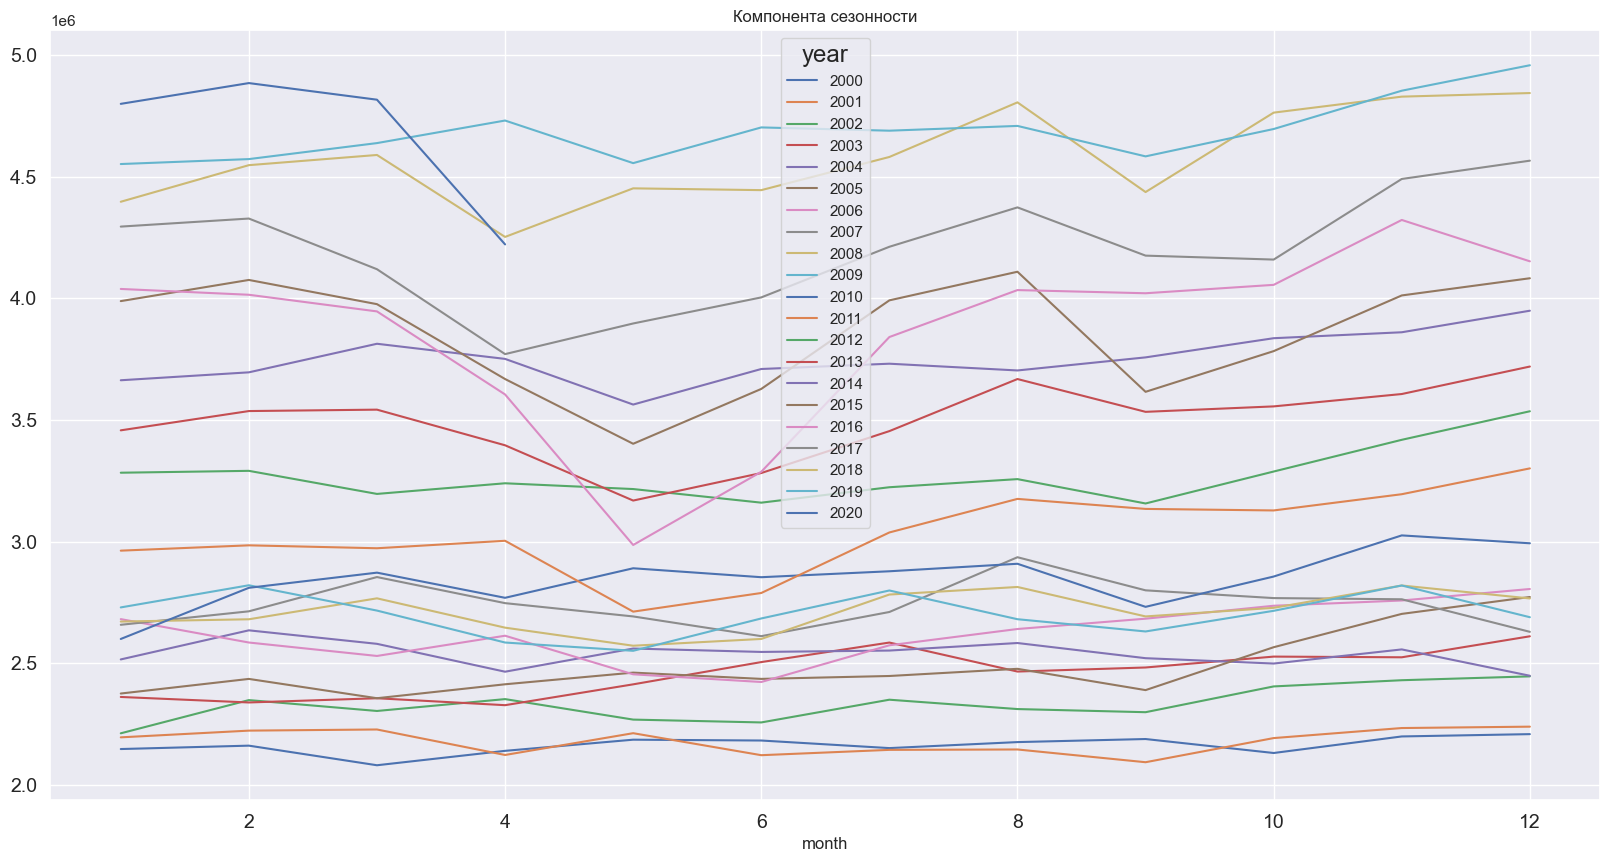

In [37]:
plt.rcParams['legend.title_fontsize'] = 'x-large'

df_pivot.plot( figsize=(20, 10),title= 'Компонента сезонности', fontsize=14)

## Можем заметить, что есть небольшая сезонность, так как каждый год с 4 по 5ый месяц количество добытой нефти падает, но потом до конца года в основном растет. Данная сезонность не так ярко выражена, но все же она есть.

# Займемся теперь декомпозицией

Text(0, 0.5, 'Residual')

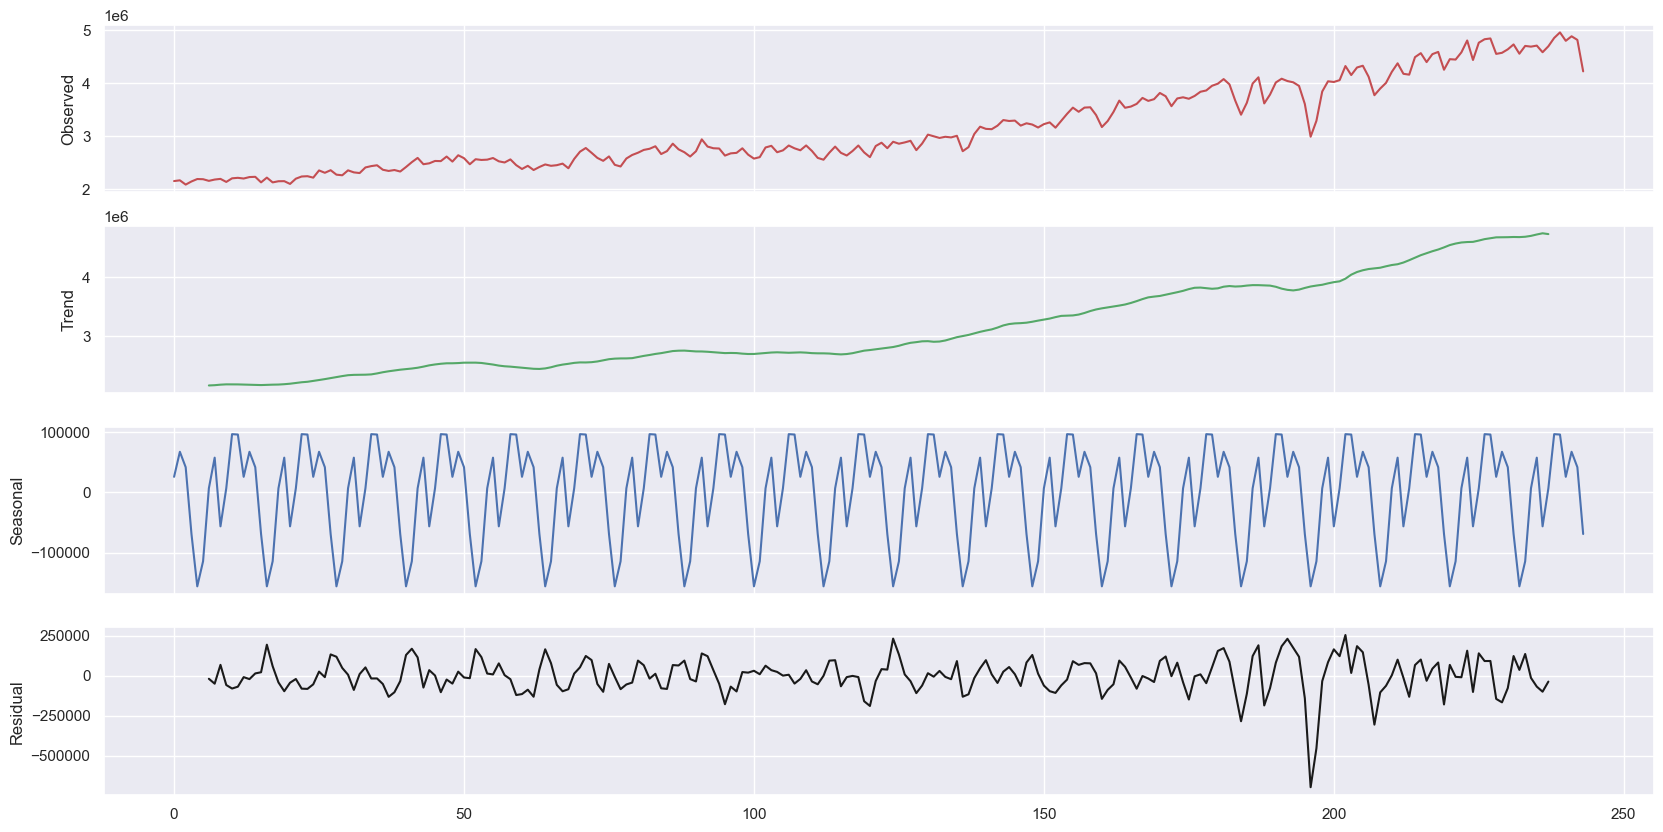

In [72]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = (20, 10)

res = sm.tsa.seasonal_decompose(df["Canada Total"], model='additive', period=  12)
fig, axes = plt.subplots(4, 1, sharex=True)

res.observed.plot(ax=axes[0], legend=False, color='r')
axes[0].set_ylabel('Observed')
res.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
res.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
res.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')

## Первоначальный график

<AxesSubplot:title={'center':'Нефть в Канаде'}>

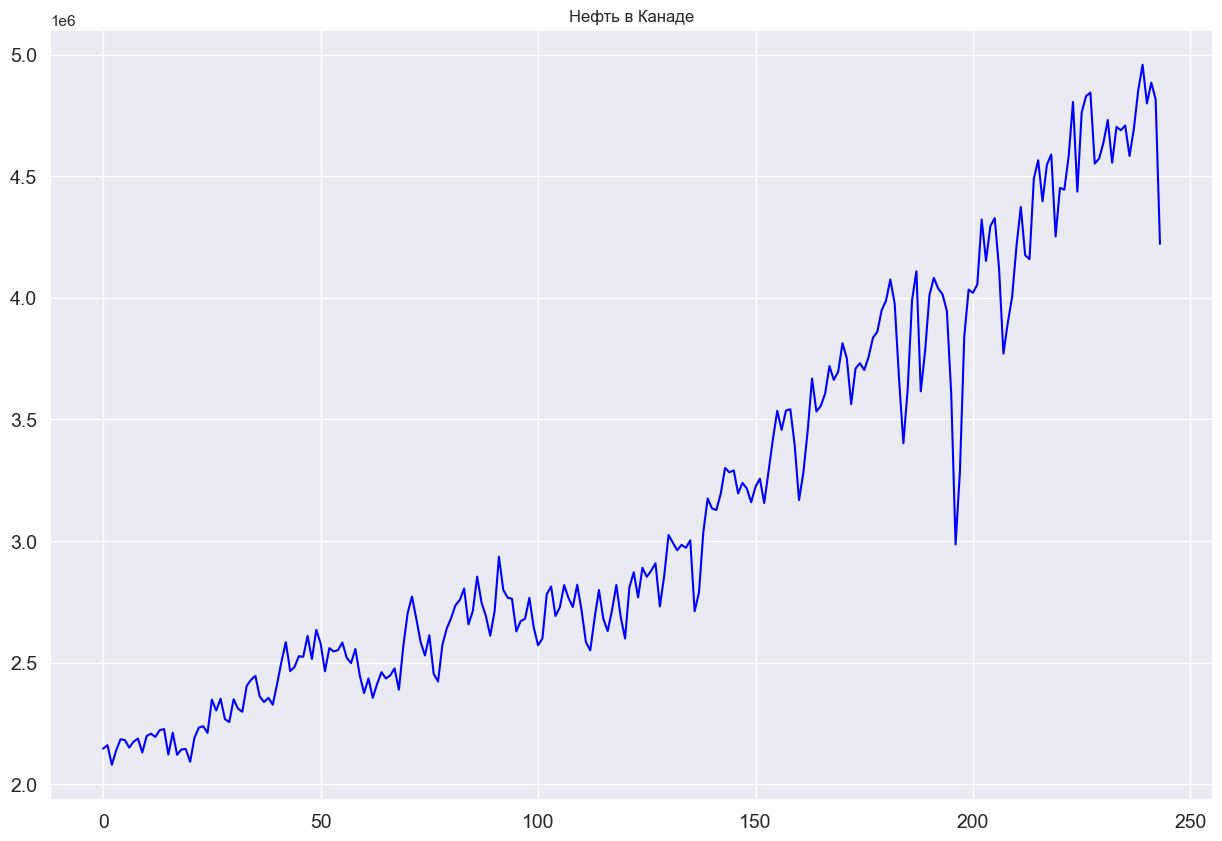

In [43]:
df['Canada Total'].plot( figsize=(15,10),title= 'Нефть в Канаде', fontsize=14, color="blue")

## Тренд

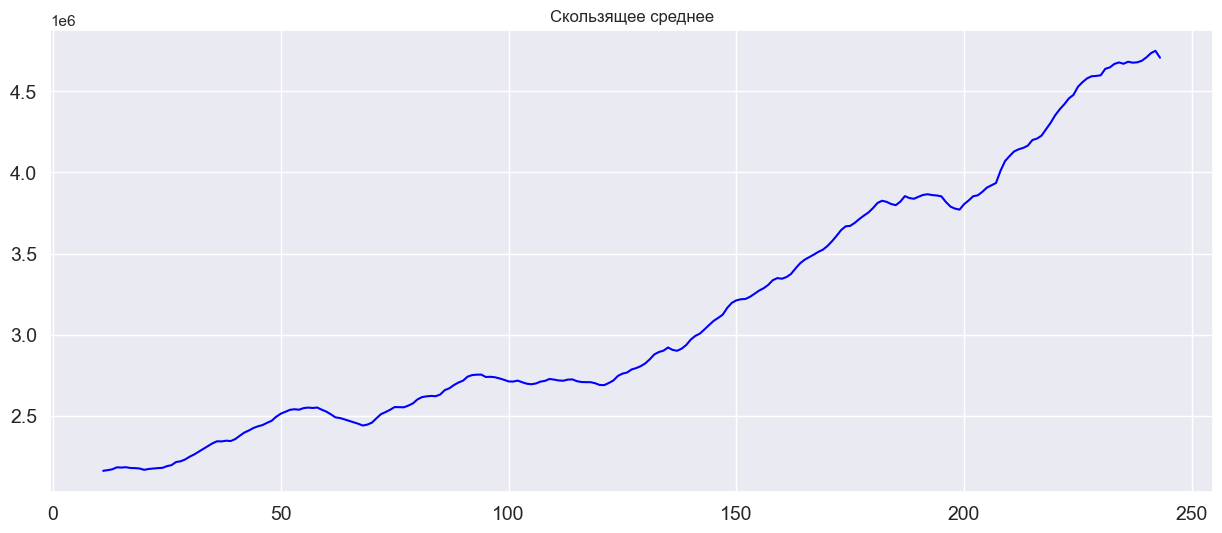

In [73]:
MA = df['Canada Total'].rolling(window=12).mean()
MA.plot( figsize=(15,6),title= 'Скользящее среднее', fontsize=14, color="blue")
plt.show()

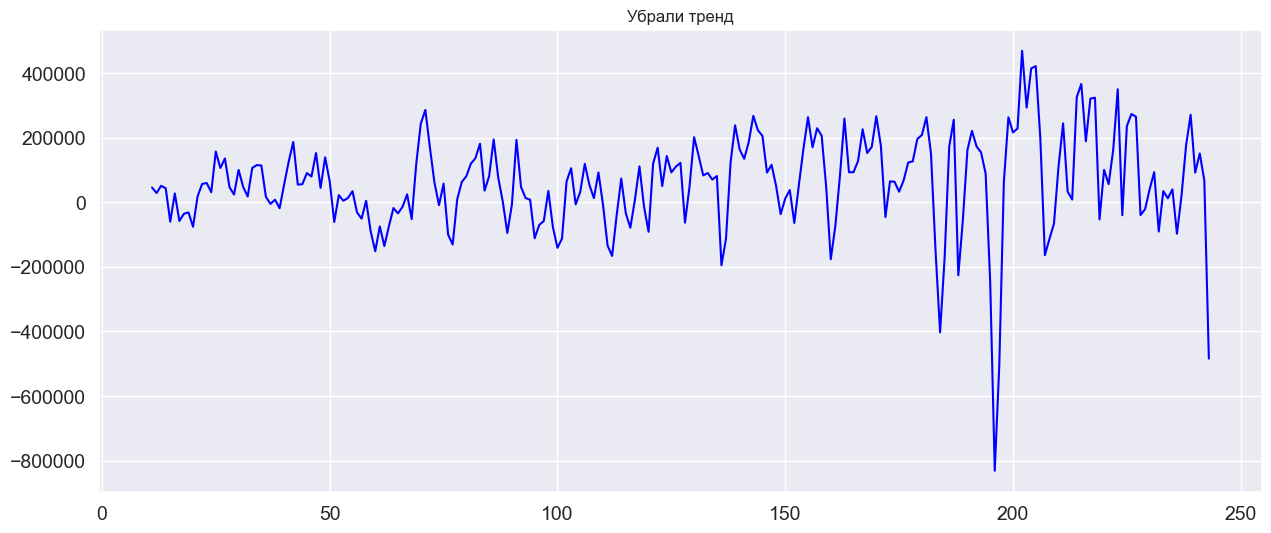

In [130]:
detrend_ = df['Canada Total'] - MA
detrend_.plot( figsize=(15,6),title= 'Убрали тренд', fontsize=14, color="blue")
plt.show()

In [70]:
from pandas.core.nanops import nanmean as pd_nanmean

def season_mean(x, period):
    """
    Return means for each period in x. period is an int that gives the
    number of periods per cycle. E.g., 12 for monthly. NaNs are ignored
    in the mean.
    """
    return np.array([pd_nanmean(x[i::period], axis=0) for i in range(period)])

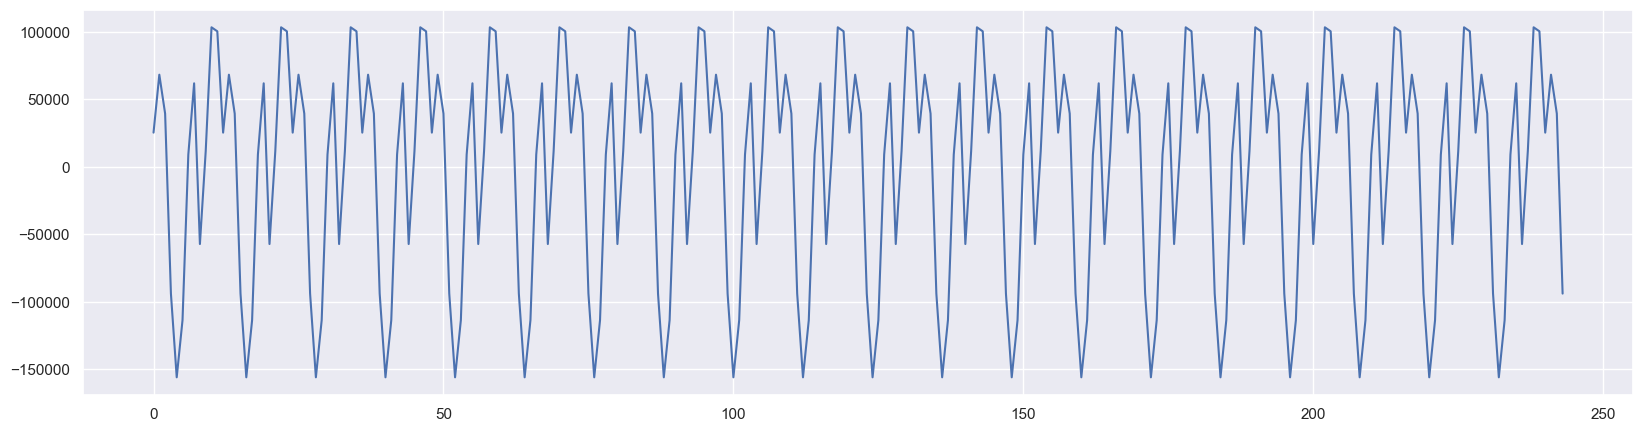

In [75]:
s_a = season_mean(detrend_, 12)
s_a -= np.mean(s_a, axis=0)
nobs = detrend_.shape[0]
seasonal = np.tile(s_a.T, nobs // 12 + 1).T[:nobs]
plt.figure(figsize=(20,5))
plt.plot(seasonal)
plt.show()

## Остатки

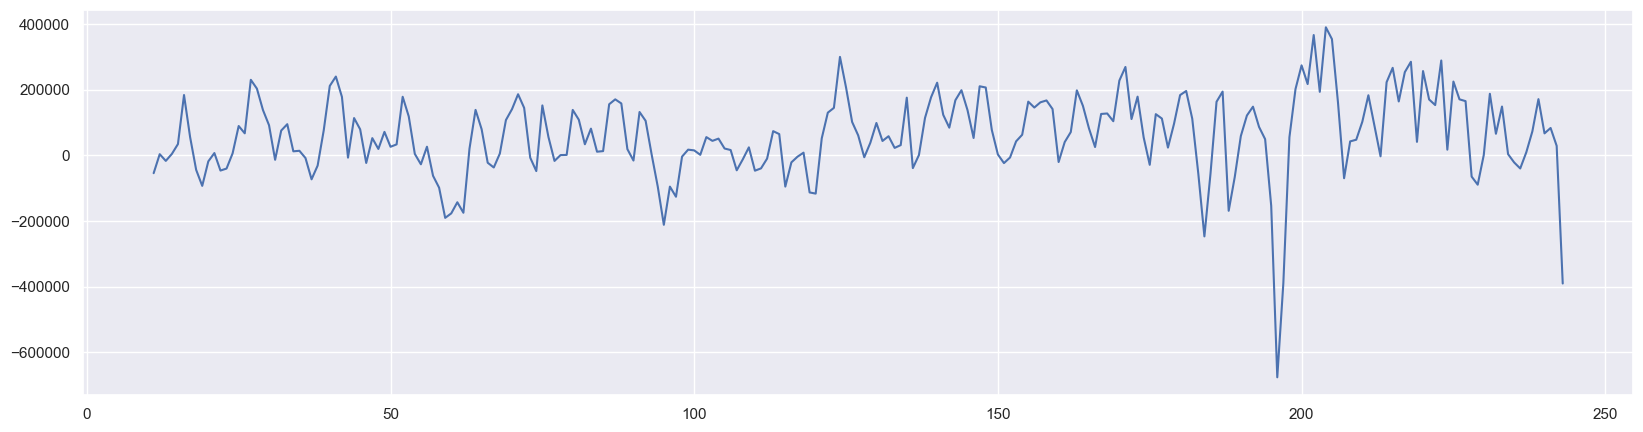

In [78]:
residuals = df['Canada Total'] - MA - seasonal
plt.figure(figsize=(20,5))
plt.plot(residuals)
plt.show()

## Сравним восстановленный и первоначальный ряд

Text(0.5, 1.0, 'Исходный ряд')

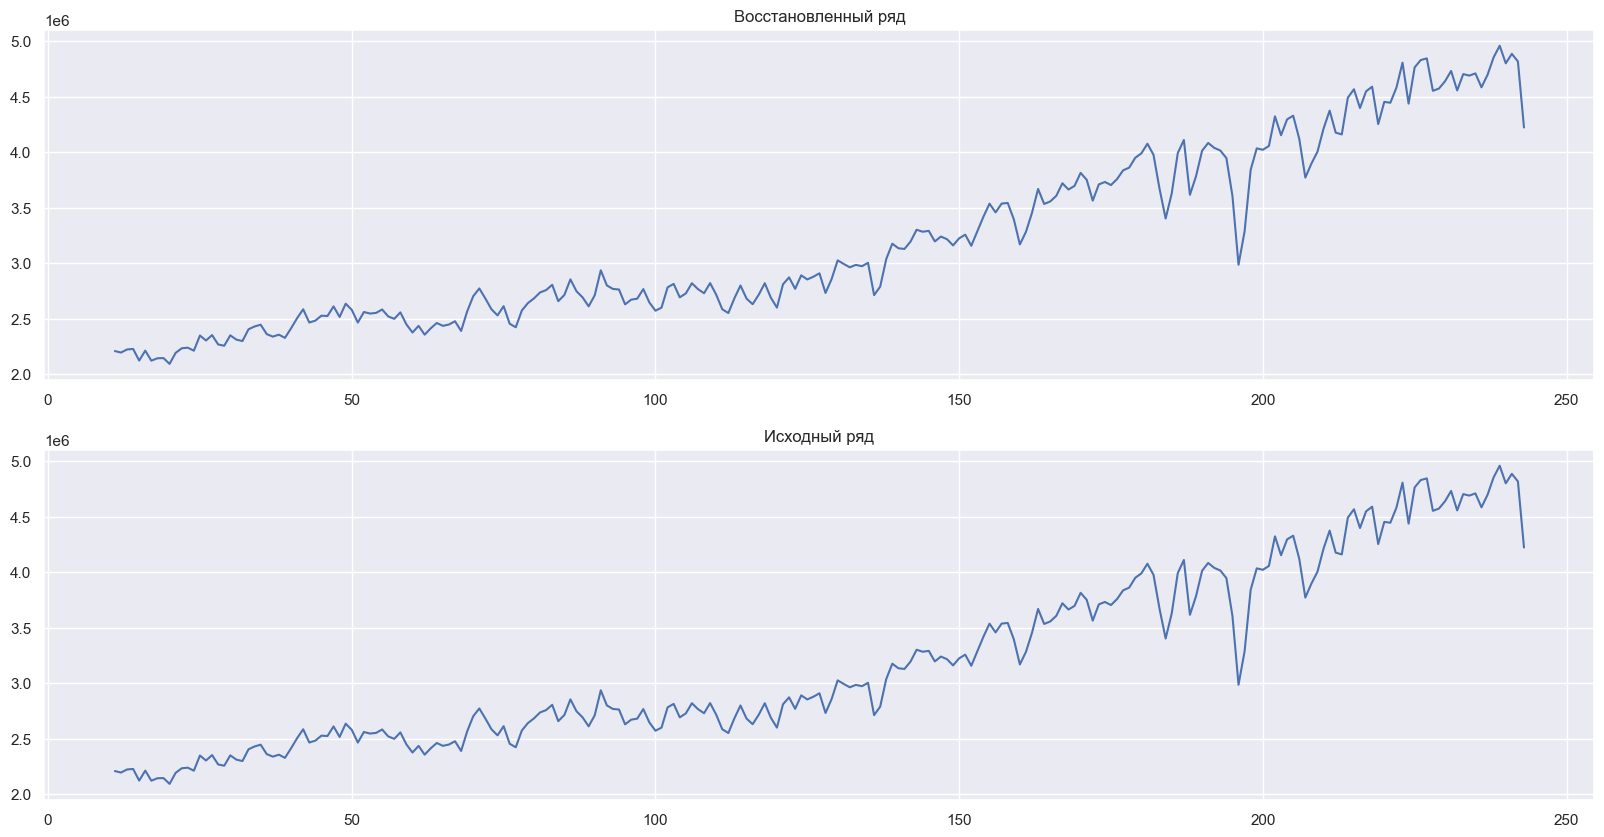

In [79]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))

ax[0].plot(MA + residuals + seasonal)
ax[0].set_title('Восстановленный ряд')
ax[1].plot(df['Canada Total'][MA.dropna().index[0]:])
ax[1].set_title('Исходный ряд')

## Посмотрим графики автокорелляции 

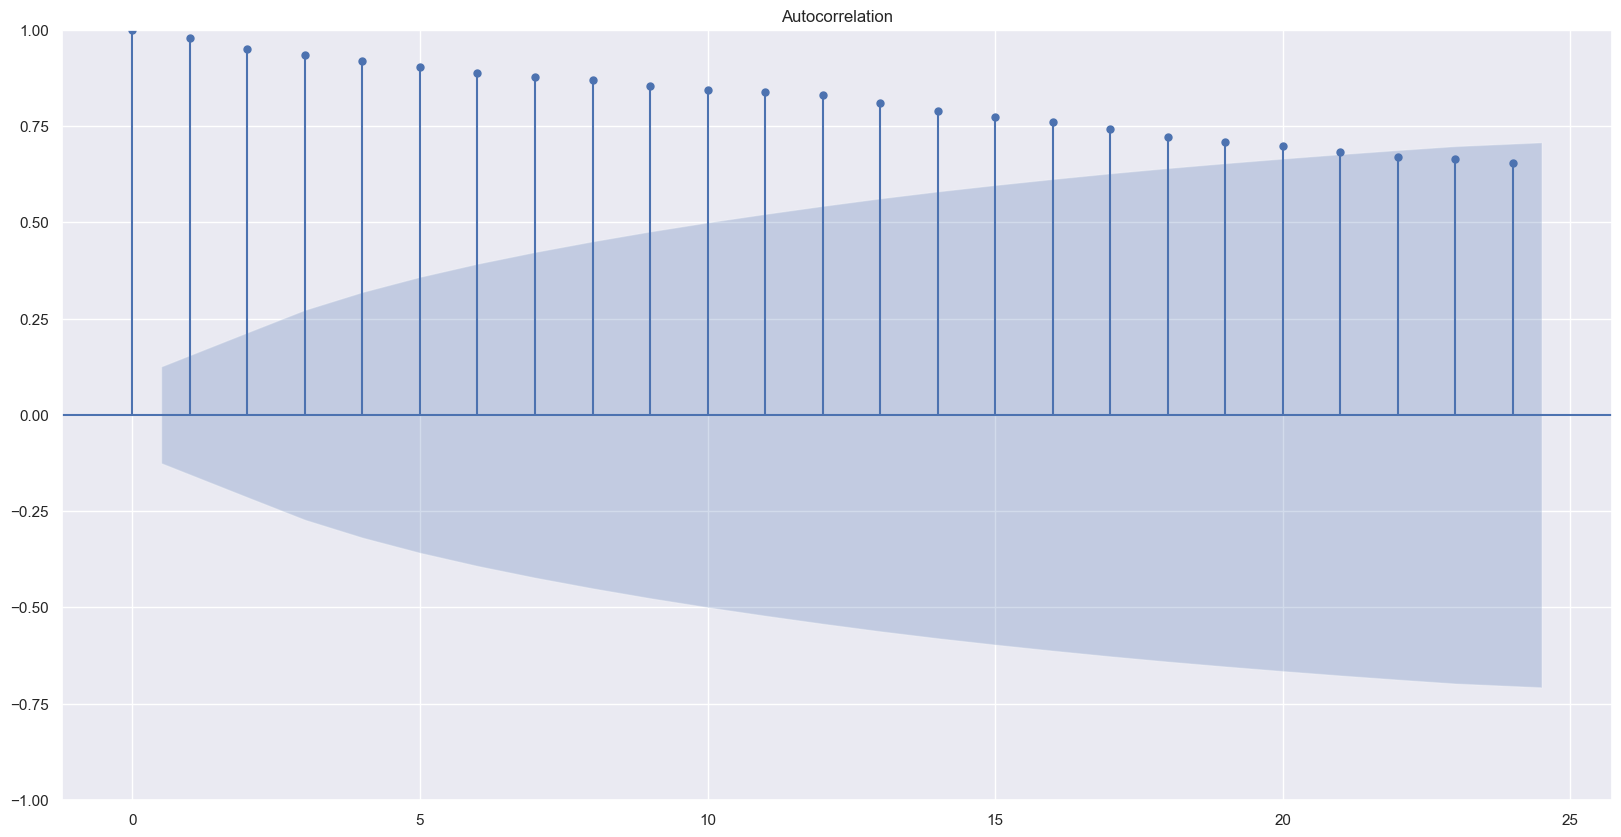

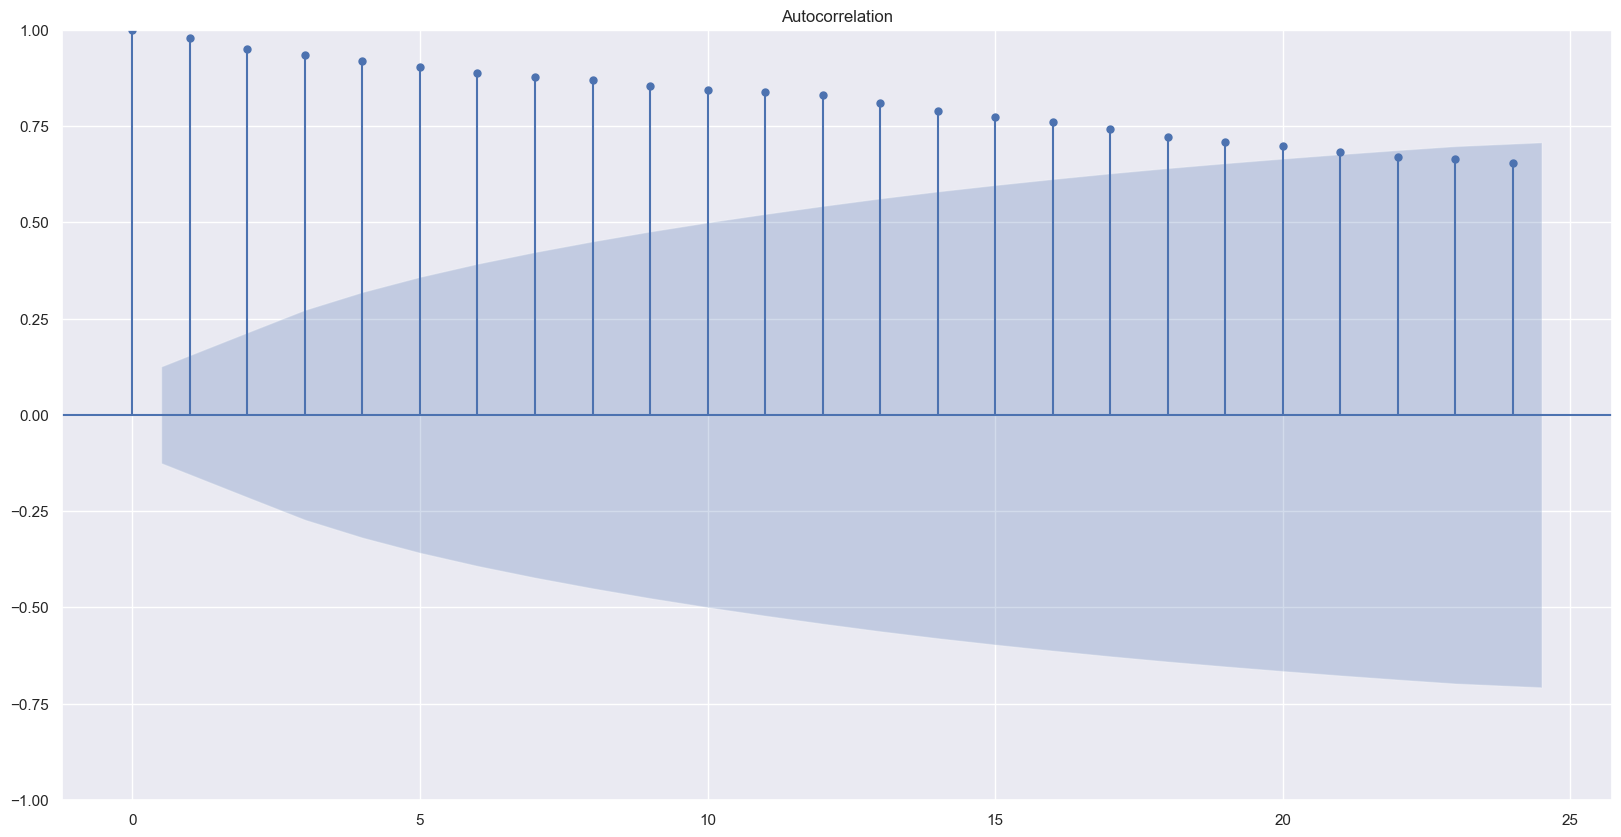

In [81]:
df2 = pd.read_excel('oil.xlsx')
df2.sort_index(inplace=True)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df2['Canada Total'].values, lags=24)

## Посмотрим графики частичной автокорелляции 

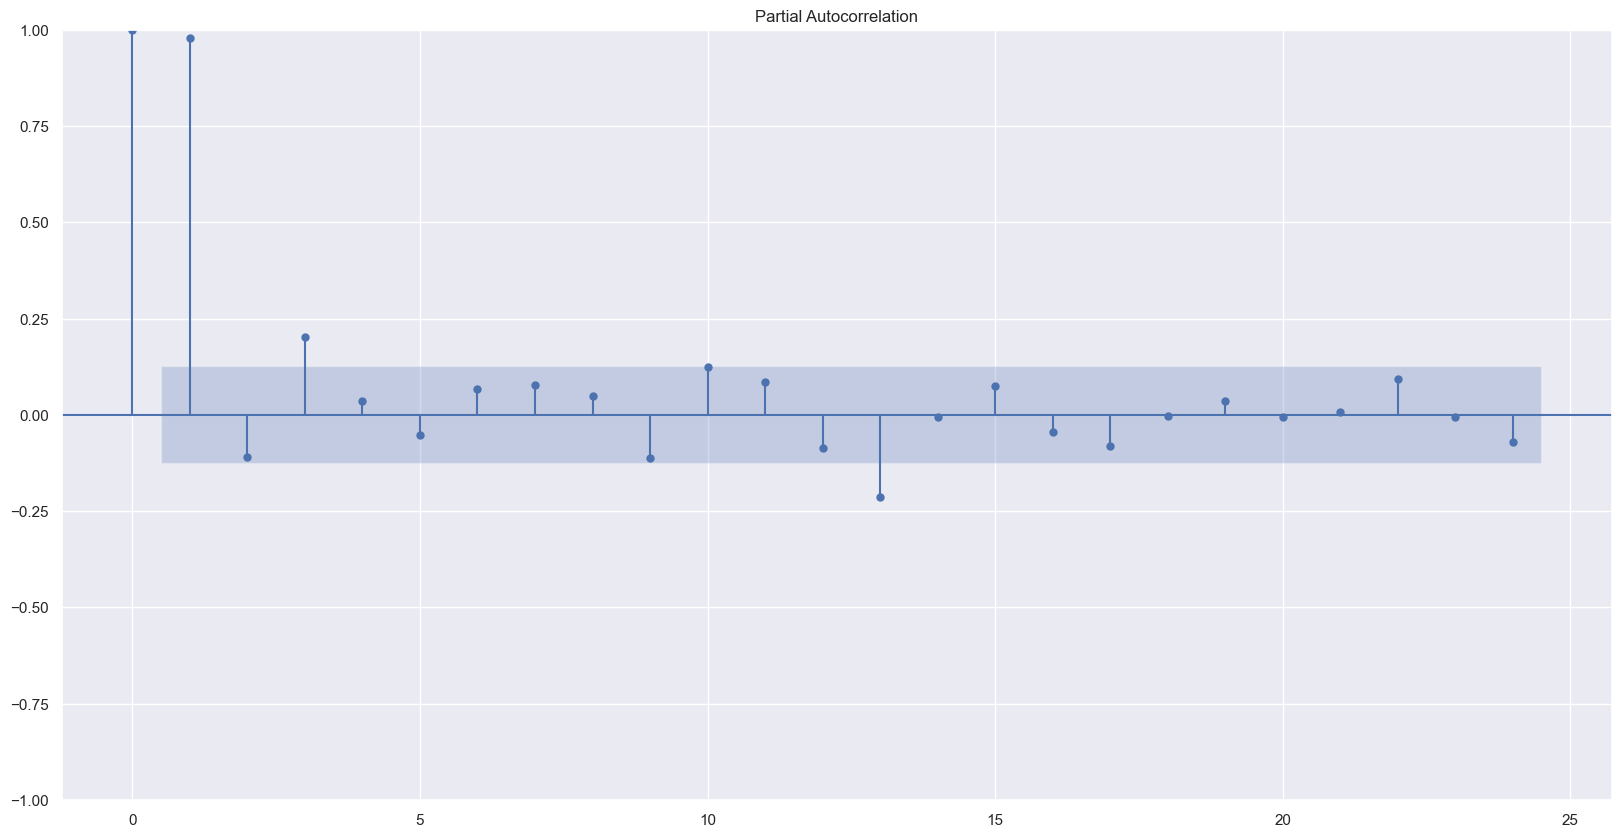

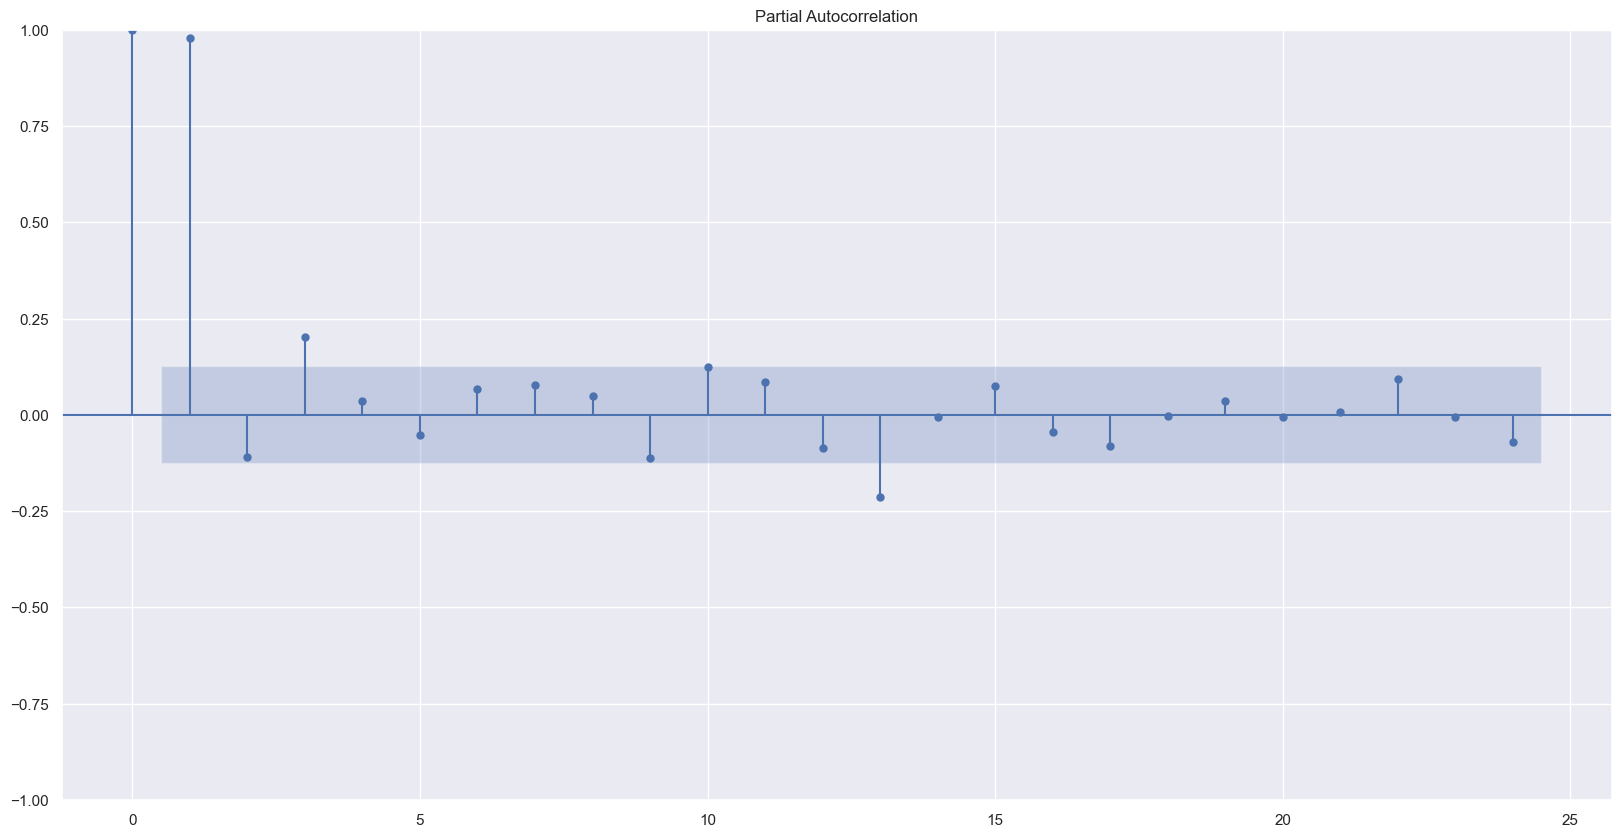

In [82]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df2['Canada Total'].values, lags=24)

## Попробуем предсказать значение нашего ряда

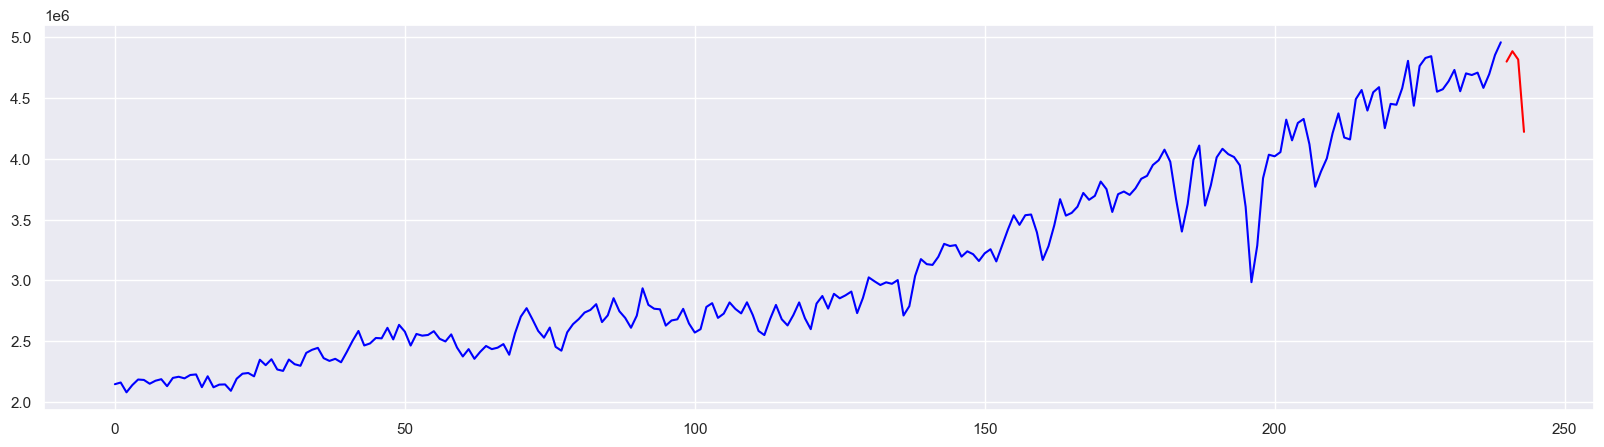

In [87]:
w_months = 4
train = df2.iloc[:-w_months] 
val   = df2.iloc[-w_months:] 
plt.figure(figsize=(20, 5))

plt.plot(train['Canada Total'], color="blue")
plt.plot(val['Canada Total'], color="red")

plt.show()

## BASELINE

In [88]:
preds = [train['Canada Total'].mean()] * w_months

In [89]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y_actual, y_predicted):
    rmse = sqrt(mean_squared_error(y_actual, y_predicted))
    return rmse

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [90]:
print('RMSE - ', rmse(val['Canada Total'], preds))
print('MAPE - ', mean_absolute_percentage_error(val['Canada Total'], preds))

RMSE -  1577769.5137824903
MAPE -  32.98925808745956


## Воспльзуемся RNN

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

In [96]:
df_m = df2['Canada Total'].values
train_size = int(len(df_m)*0.7)
test_size = len(df_m) - train_size

train, test = df_m[:train_size], df_m[train_size:]

In [106]:
def create_dataset(dataset, lookback):
    X,y = [],[]
    for i in range(len(dataset) - lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.FloatTensor(X), torch.FloatTensor(y)

In [116]:
lookback = 5
X_train,y_train = create_dataset(train,lookback=lookback)
X_test,y_test = create_dataset(test,lookback=lookback)
X_train = X_train.unsqueeze(-1)
X_test = X_test.unsqueeze(-1)
y_train = y_train.unsqueeze(-1)
y_test = y_test.unsqueeze(-1)

In [108]:
class RNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size = 1,hidden_size = 50, num_layers = 1, batch_first = True)
        self.linear = nn.Linear(50,1)
        
    def forward(self,x):
        x,_ = self.lstm(x)
        x = self.linear(x)
        return x

In [117]:
print(X_train.shape)

torch.Size([165, 5, 1])


In [118]:
model = RNN()
model

RNN(
  (lstm): LSTM(1, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [119]:
optimizer = optim.Adam(model.parameters())
criterion = nn.MSELoss(reduction = 'mean')
loader  = data.DataLoader(data.TensorDataset(X_train,y_train), batch_size = 8)

In [120]:
epochs = 2000
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred,y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if epoch % 100 !=0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_mse = criterion(y_pred,y_train)
        y_pred = model(X_test)
        test_mse = criterion(y_pred,y_test)
        
    print("epoch %d, train MSE %f, test MSE %f" % (epoch,train_mse,test_mse))

epoch 0, train MSE 7401768484864.000000, test MSE 17878631841792.000000
epoch 100, train MSE 7401673064448.000000, test MSE 17878480846848.000000
epoch 200, train MSE 7401577119744.000000, test MSE 17878331949056.000000
epoch 300, train MSE 7401481175040.000000, test MSE 17878180954112.000000
epoch 400, train MSE 7401384181760.000000, test MSE 17878029959168.000000
epoch 500, train MSE 7401288237056.000000, test MSE 17877881061376.000000
epoch 600, train MSE 7401192816640.000000, test MSE 17877732163584.000000
epoch 700, train MSE 7401096347648.000000, test MSE 17877581168640.000000
epoch 800, train MSE 7401000402944.000000, test MSE 17877430173696.000000
epoch 900, train MSE 7400903933952.000000, test MSE 17877279178752.000000
epoch 1000, train MSE 7400807989248.000000, test MSE 17877128183808.000000
epoch 1100, train MSE 7400712044544.000000, test MSE 17876979286016.000000
epoch 1200, train MSE 7400616099840.000000, test MSE 17876830388224.000000
epoch 1300, train MSE 7400519106560.0

## Как можно заметить, ошибки очень большие, так как ряд не стационарен. 